In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_curve, auc
)

In [14]:
print("Loading Seed dataset...")
df = pd.read_csv("Seed_Data.csv")  

X = df.drop('target', axis=1).values
y = df['target'].values

print("Dataset shape:", X.shape)
print("Sample label:", y[0])

Loading Seed dataset...
Dataset shape: (210, 7)
Sample label: 0


In [15]:
# Classify “1” vs “Not 1”
y_binary = (y == 1).astype(int)  # 1 if class is 1, else 0

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)

In [16]:
print("Training Logistic Regression model...")
model = LogisticRegression(solver='liblinear')  # liblinear works well for small datasets
model.fit(X_train, y_train)


Training Logistic Regression model...


LogisticRegression(solver='liblinear')

In [17]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\n=== Model Evaluation ===")
print("Accuracy:", acc)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Not Class 1', 'Class 1']))



=== Model Evaluation ===
Accuracy: 0.9761904761904762

Confusion Matrix:
 [[27  1]
 [ 0 14]]

Classification Report:
               precision    recall  f1-score   support

 Not Class 1       1.00      0.96      0.98        28
     Class 1       0.93      1.00      0.97        14

    accuracy                           0.98        42
   macro avg       0.97      0.98      0.97        42
weighted avg       0.98      0.98      0.98        42



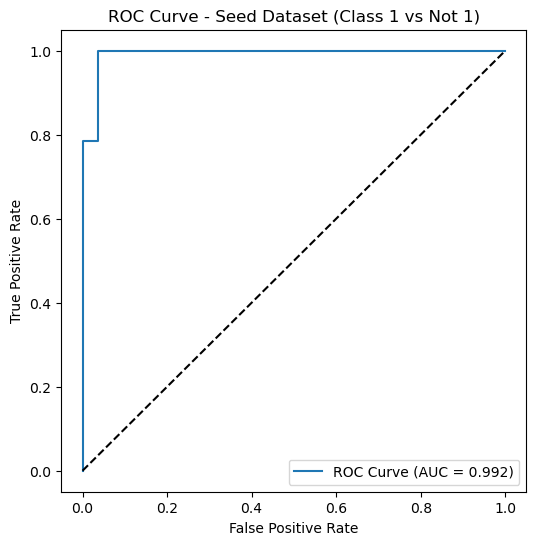

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Seed Dataset (Class 1 vs Not 1)")
plt.legend()
plt.show()